# **Trabalhando com Planilhas Excel**

In [29]:
import pandas as pd

In [101]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [102]:
# Juntando todos os arquivos.
df = pd.concat([df1, df2, df3, df4, df5])

In [32]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [33]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
28,Aracaju,2018-01-01,114.93,1520,5
206,Salvador,2019-01-02,151.45,1036,2
2,Fortaleza,2019-02-10,35.33,1004,3
100,Salvador,2019-01-01,190.97,1036,2
230,Natal,2019-01-03,184.69,1036,1


In [35]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [103]:
# Alterando o tipo de dado da coluna LojaID.
df["LojaID"] = df["LojaID"].astype("object")

In [37]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [38]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## **Tratanto valores faltantes**

In [104]:
# Consiltando linhas com valores faltantes.
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [43]:
# Substituindo os valores nulos pela média.
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [40]:
df["Vendas"].mean()

122.61180089485458

In [21]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [47]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
14,Fortaleza,2019-01-12,132.68,1005,1
96,Fortaleza,2019-01-01,23.31,1004,4
208,Salvador,2019-01-02,39.40,1036,3
100,Natal,2019-01-02,190.97,1036,2
222,Natal,2019-01-02,43.96,1037,1
11,Natal,2019-02-09,564.00,853,3
51,Fortaleza,2019-01-01,30.47,1005,3
100,Recife,2019-01-01,35.11,982,4
114,Salvador,2019-03-02,25.52,1034,1
52,Salvador,2019-01-01,43.77,1036,2


In [105]:
# Substituindo os valores nulos por zero.
df["Vendas"].fillna(0, inplace=True)

In [56]:
# Apagando as linhas com valores nulos.
df.dropna(inplace=True)

In [ ]:
# Apagando as linhas com valores nulos com base em apenas em 1 coluna.
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas.
df.dropna(how="all", inplace=True)

## **Criando colunas novas**

In [106]:
# Criando a coluna de receita.
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [51]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [107]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [108]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [68]:
# Retornando a maior receita.
df["Receita"].max()

3544.0

In [67]:
# Retornando a menor receita.
df["Receita"].min()

3.34

In [69]:
# nlargest retorna a quantidade desejada de maiores números.
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [70]:
# nsmallsest retorna a quantidade desejada de menores números.
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [71]:
# Agrupamento por cidade.
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [72]:
# Ordenado o conjunto de dados.
df.sort_values("Receita", ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com datas**

In [109]:
# Transformando a coluna de em tipo inteiro.
df["Data"] = df["Data"].view("int64")

In [76]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [110]:
# Transformando coluna de data em data.
df["Data"] = pd.to_datetime(df["Data"])

In [78]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [111]:
# Agrupamento por ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [112]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [113]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
107,Natal,2019-01-02,14.70,1035,1,14.70,1.0,2019
185,Salvador,2019-01-02,6.67,1036,1,6.67,1.0,2019
56,Salvador,2019-01-01,178.44,1035,3,535.32,3.0,2019
113,Aracaju,2018-01-01,23.05,1521,9,207.45,9.0,2018
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019


In [114]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [115]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
170,Natal,2019-01-02,9.26,1035,3,27.78,3.0,2019,1,2
32,Salvador,2019-01-01,151.27,1035,1,151.27,1.0,2019,1,1
20,Recife,2019-01-01,42.35,982,3,127.05,3.0,2019,1,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2
65,Aracaju,2018-01-01,145.54,1522,3,436.62,3.0,2018,1,1


In [116]:
# Retornando a data mais antiga.
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [117]:
# Calculando a diferença de dias.
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [118]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,6.0,2019,2,10,405 days
6,Salvador,2019-01-01,36.30,1034,2,72.60,2.0,2019,1,1,365 days
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,3.0,2019,1,1,365 days
137,Natal,2019-01-02,51.66,1036,3,154.98,3.0,2019,1,2,366 days
107,Salvador,2019-01-01,14.70,1035,1,14.70,1.0,2019,1,1,365 days


In [119]:
# Criando a coluna de trimestre.
df["trimestre_venda"] = df["Data"].dt.quarter

In [120]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
77,Salvador,2019-01-01,218.76,1037,1,218.76,1.0,2019,1,1,365 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
223,Natal,2019-01-02,40.51,1037,2,81.02,2.0,2019,1,2,366 days,1
69,Salvador,2019-01-01,14.79,1035,1,14.79,1.0,2019,1,1,365 days,1
175,Salvador,2019-01-02,16.53,1036,2,33.06,2.0,2019,1,2,366 days,1


In [121]:
# Filtrando as vendas de 2019 ao mês de março.
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [123]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
135,Salvador,2019-03-02,9.95,1037,3,29.85,3.0,2019,3,2,425 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,3.0,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1


## **Visualização de Dados**

In [124]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

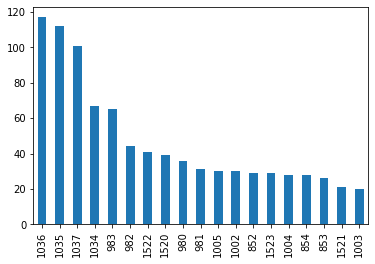

In [125]:
# Gráfico de barras.
df["LojaID"].value_counts(ascending=False).plot.bar()

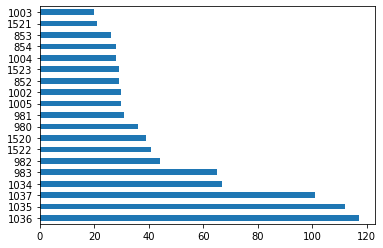

In [126]:
# Gráfico de barras horizontais.
df["LojaID"].value_counts(ascending=False).plot.barh()

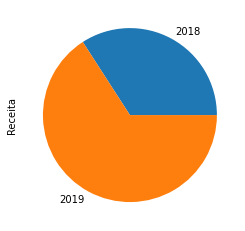

In [127]:
# Gráfico de Pizza.
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [128]:
# Total vendas por cidade.
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

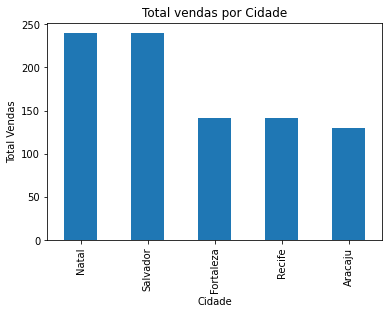

In [129]:
# Adicionando um título e alterando o nome dos eixos.
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

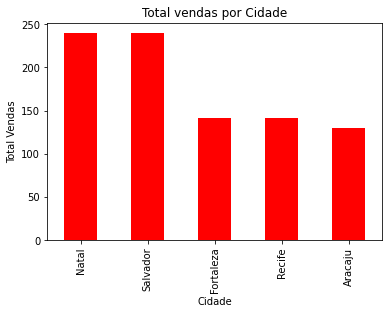

In [130]:
# Alterando a cor.
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [131]:
# Alterando o estilo.
plt.style.use("ggplot")

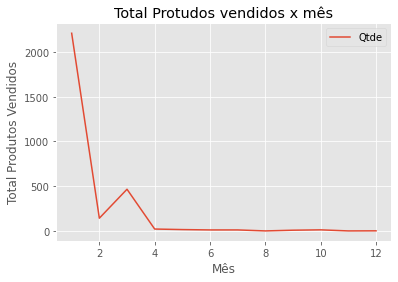

In [144]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Protudos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [136]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [137]:
# Selecionando apenas as vendas de 2019.
df_2019 = df[df["Ano_Venda"] == 2019]

In [139]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

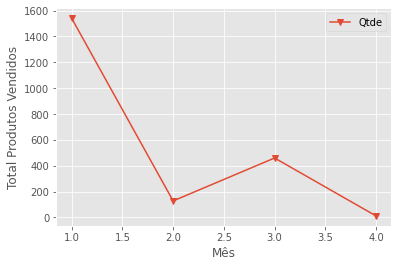

In [140]:
# Total produtos vendidos por mês.
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

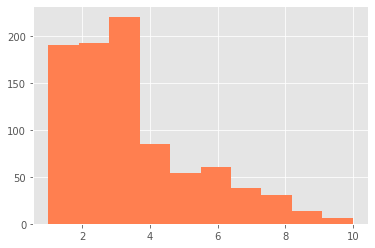

In [142]:
# Hisograma
plt.hist(df["Qtde"], color = "coral");

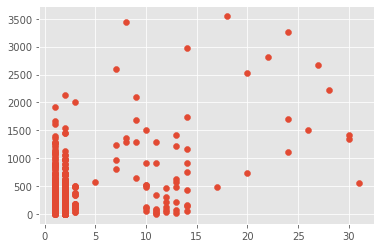

In [143]:
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"]);

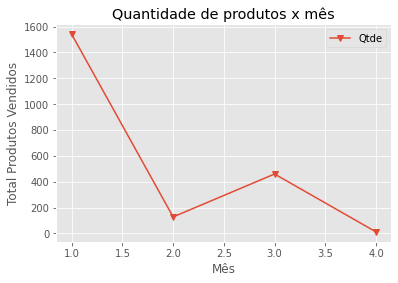

In [145]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")